In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from sqlalchemy import MetaData, Table


In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")
connection = engine.connect()

In [5]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables

Base.prepare(autoload_with=engine)


In [6]:
# View all of the classes that automap found

Base.classes.keys()


['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
print(f"The most recent date in the data is" , recent_date)

The most recent date in the data is 2017-08-23


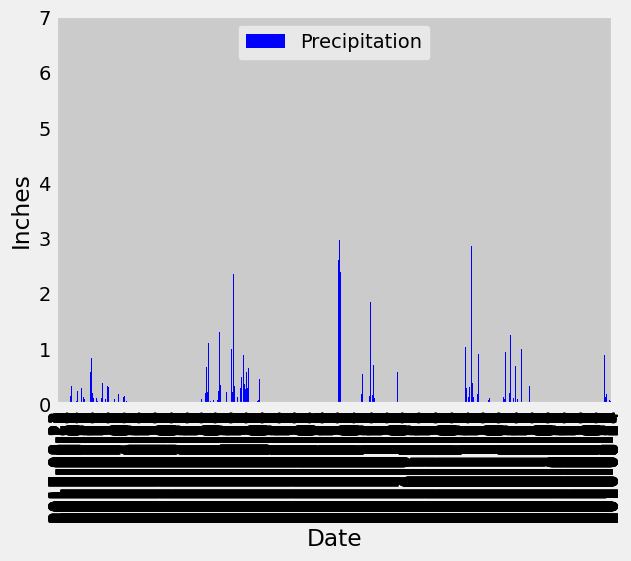

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = (dt.datetime.strptime(recent_date, '%Y-%m-%d') - dt.timedelta(days=365)).date()
# Perform a query to retrieve the data and precipitation scores

date_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > year_ago).\
    order_by(Measurement.date.desc()).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
date_prcp_df = pd.DataFrame(date_prcp, columns=['Date', 'Precipitation'])
date_prcp_df.set_index('Date', inplace=True)
date_prcp_df

# Sort the dataframe by date
date_prcp_df.sort_values(by='Date')

# Use Pandas Plotting with Matplotlib to plot the data
#x_axis = date_prcp_df.index
#y_axis = date_prcp_df.values

#xpos = np.arange(len(x_axis))

#plt.xticks(xpos,x_axis)
bar_chart = date_prcp_df.plot.bar(color='b')

plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend()
plt.show()


In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_prcp_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Measurement).group_by(Measurement.station).count()
print(total_stations)

9


In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_list = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
print(most_active_list)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
print(f"The station with the greatest number of observations is:" , most_active[0])

lha_temp = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter( Measurement.station == most_active[0] ).all()
print(f"The lowest, highest, and average temperatures are:" ,lha_temp)

The station with the greatest number of observations is: USC00519281
The lowest, highest, and average temperatures are: [(54.0, 85.0, 71.66378066378067)]


In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

ma_data = session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.date > year_ago, Measurement.station == most_active[0] ).\
    order_by(Measurement.date.desc()).all()
ma_data




[('USC00519281', 79.0),
 ('USC00519281', 76.0),
 ('USC00519281', 76.0),
 ('USC00519281', 77.0),
 ('USC00519281', 77.0),
 ('USC00519281', 77.0),
 ('USC00519281', 83.0),
 ('USC00519281', 82.0),
 ('USC00519281', 77.0),
 ('USC00519281', 76.0),
 ('USC00519281', 81.0),
 ('USC00519281', 82.0),
 ('USC00519281', 81.0),
 ('USC00519281', 76.0),
 ('USC00519281', 75.0),
 ('USC00519281', 77.0),
 ('USC00519281', 75.0),
 ('USC00519281', 82.0),
 ('USC00519281', 77.0),
 ('USC00519281', 77.0),
 ('USC00519281', 77.0),
 ('USC00519281', 76.0),
 ('USC00519281', 76.0),
 ('USC00519281', 76.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 76.0),
 ('USC00519281', 74.0),
 ('USC00519281', 74.0),
 ('USC00519281', 72.0),
 ('USC00519281', 69.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 75.0),
 ('USC00519281', 74.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 76.0),
 ('USC00519281', 81.0),
 ('USC00519281', 79.0),
 ('USC00519281', 76.0),
 ('USC00519281',

# Close session

In [ ]:
# Close Session
session.close()